# Project: TMDB Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDB is the dataset originated from Kaggle to be used for this investigated research. That dataset contains over 10,00 movies gathered from The Movie Database(TMDB). Consisting of of 21 columns addressing areas as revenue, budget, and popularity.

The following segment provides the research questions that guided this exploratory analysis.

1. Which movie has the highest and lowest profit?
2. Is there a relationship between higher budgeted movies and more revenue?
3. What impact do user ratings have on proft?
4. Which genres demonstrates the highest profit?


In [8]:
# Import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The imported statements populate the interactive numpy an dmatplotlib namespace.

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Load data and review bases of information including data types, columns, values and missing data.
1. 10866 rows 
2. 21 columns
3. Missing values present
4. Select entries demonstrating budget/revenue input

### Steps to clean up the data
1. Remove any duplicates in the dataset
2. Keep columns that are necessary for the analysis and remove the others
3. Remove rows with 0 or NaN values for budget and revenue
4. Create a column with profit: budget/revenue

In [9]:
# Read csv into Pandas Dataframe and store in dataset variable
movies_df = pd.read_csv('tmdb-movies.csv')

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
# Remove Duplicates
movies_df.drop_duplicates(inplace=True)

We found one duplicate row while assessing the data. That row will now be removed from the dataframe. 

In [11]:
# Subset data with only the columns that we are interested in
# Make a list of columns to be deleted
remove = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj','homepage', 'cast', 'keywords', 'tagline', 'overview', 'runtime',
          'production_companies', 'release_date']

# Remove the columns and keep the ones we want
movies_df2 = movies_df.drop(remove,1)
movies_df2.head()

,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


After deleting all rows with budget or revenue that equalling 0, 3853 entries remain (not including the column label).

In [12]:
# Remove rows with missing values for budget and revenue or if they equal to 0
columns = ['budget','revenue']
movies_df2[columns] = movies_df2[columns].replace(0, np.NaN)
movies_df2.dropna(subset = columns, inplace=True)

# Check rows and columns of the clean dataset
movies_df2.shape

(3854, 8)

In [13]:
# Create a column for profit
# Profit = Revenue - Budget
def calc_profit (data):
    revenue = data['revenue']
    budget = data['budget']
    data.insert(2, 'profit', revenue - budget)
    return data

# Create a new column for profit and check that it is added correctly
calc_profit(movies_df2)
movies_df2.head(5)

,budget,revenue,profit,original_title,director,genres,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


The profit column has now bee added to the dataset.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which movie has the highest and lowest profit?

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Write a function to determine which movie has the highest and lowest profit? 
def max_min_profit(data):
    '''This function displays information on which movie has the highest and lowest profit?'''
    profit = data['profit']
    max_profit = profit.idxmax()
    max_info = pd.DataFrame(data.loc[max_profit])
    min_profit = profit.idxmin()
    min_info = pd.DataFrame(data.loc[min_profit])
    
    return pd.concat([max_info, min_info], axis=1)

# The maximum and minimum profit movie information is displayed
max_min_profit(movies_df2)


,1386,2244
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010


According to the table Avatar is listed as profiting $2,544,505,847 and Warrior's Way $413,912,431 illustrating the budget exceeded its profits.

### Research Question 2:  Is there a relationship between higher budgeted movies and more revenue?

,budget,revenue
budget,1.000000,0.688556
revenue,0.688556,1.000000


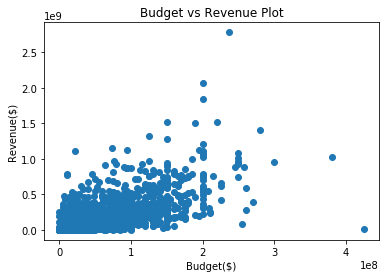

In [15]:
# Scatterplot between budget and revenue to examine trend
plt.scatter(movies_df2['budget'],movies_df2['revenue'])
plt.xlabel('Budget($)')
plt.ylabel('Revenue($)')
plt.title('Budget vs Revenue Plot')

# Pearson correlation
movies_df2[columns].corr(method='pearson')


The plot illustrates budget and revenue as a degree of correlation with a value or r=0.69 demontrating a positive correlation, acceptable yet not significantly strong.

### Research Question 3: What impact do user ratings have on proft?

,profit,vote_average
profit,1.000000,0.259435
vote_average,0.259435,1.000000


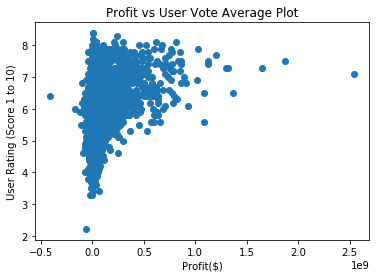

In [16]:
# Scatterplot between budget and revenue to examine trend
plt.scatter(movies_df2['profit'],movies_df2['vote_average'])
plt.xlabel('Profit($)')
plt.ylabel('User Rating (Score 1 to 10)')
plt.title('Profit vs User Vote Average Plot')

# Pearson correlation
vote_profit = ['profit','vote_average']
movies_df2[vote_profit].corr(method='pearson')

The is no significant correlation between vote average and profit. The main sector of datapoints are between $0-$50,000,000 ranging in scores between 3-9.

In [17]:
# Check vote count and vote average information  
vote_info = movies_df2['vote_count'].describe()
score_info = movies_df2['vote_average'].describe()
print(pd.concat([vote_info,score_info], axis=1))

        vote_count  vote_average
count  3854.000000   3854.000000
mean    527.720291      6.168163
std     879.956821      0.794920
min      10.000000      2.200000
25%      71.000000      5.700000
50%     204.000000      6.200000
75%     580.000000      6.700000
max    9767.000000      8.400000


That data for vote_average aligns with the plot illustrating an average score of 6 and minimum score of 2.2, and max score of 8.4. Notwith standing, a large range of vote counts for individual movies exists. Demonstring the minimum count as 10 and maximum count as 9767 and mean average of 527. The discrepancy in vote counts among movies may indicate the lack of association between user rating and profit.

### Research Question 4: Which genres demonstrates the highest profit?

Text(0.5, 1.0, 'Annual Change in Profit')

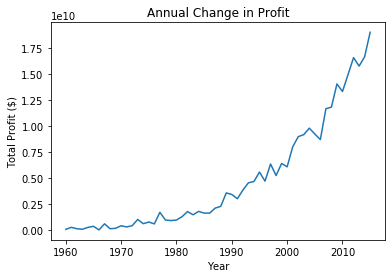

In [18]:
# Group the data by release year and then sum up the profit for each year
total_annual_profit = movies_df2.groupby('release_year')['profit'].sum()

# Plot the change in annual profit over years
plt.plot(total_annual_profit)
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.title('Annual Change in Profit')

Text(0.5, 1.0, 'Annual Change in Average Profit')

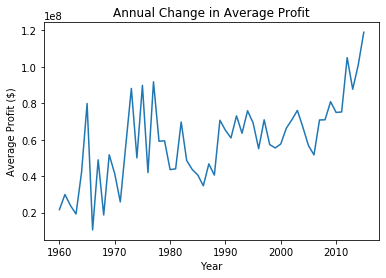

In [19]:
# Group the data by release year and then calculate the average profit for each year
total_avg_profit = movies_df2.groupby('release_year')['profit'].mean()

# Plot the change in average profit over years
plt.plot(total_avg_profit)
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.title('Annual Change in Average Profit')

Both plots demonstrate and increase in profits throughout the years. Increasing consistently over the last 50 years. An average annual profit also increases throughout the years however illustrating fluctuations.

<a id='conclusions'></a>
## Conclusions

The intent of this exploratory data analysis has helped answer the research questions: Which movie has the highest and lowest profit? Is there a relationship between higher budgeted movies and more revenue? What impact do user ratings have on proft? Which genres demonstrates the highest profit? The data illustrates budget as having a positive correlation with revenue indictating a higher budget is associated with more revenue. The data also shows that the rating did not show a strong correlation with profit, however, high profit movies illustrate higher average rating. 

## Limitations

The analysis was not exaustive and future research is recommended. The data provided does not illustrate an assurance of profit as many additional variables are at play with regard to creating a successful movie which have not been considered. For example, marketing and trends. There is not verifiable credentials that the data used for this analysis is current and cannot confirm its dependablity or reliability that the information used is accurate.